# Lab 5 - BCC406

## REDES NEURAIS E APRENDIZAGEM EM PROFUNDIDADE

## Redes de Convolução (CNN)

### Prof. Eduardo e Prof. Pedro

Objetivos:

- Uso de modelos para biometria.
- Uso de modelos pré-treinados para biometria.
- Notebook baseado em tensorflow e Keras.

Data da entrega : 23/09 

- Execute todo notebook e salve tudo em um PDF **nomeado** como "NomeSobrenome-LabX.pdf"
- Envie o PDF via google [FORM](https://forms.gle/4k8bjrzH3KYzRWMg9)


# Biometria

Biometria nada mais é do que uma medida biológica, do grego *bios* - vida, e *metricos* - medida. O conceito de biometria surgiu em 1858, contudo o seu uso como tecnologia de segurança data de 1972. Essa abordagem sobrepuja o sistema de login-senha, pois se baseia em características únicas do indivíduo e que são difíceis de se copiar.

É possível realizar o reconhecimento de um indivíduo por meio de técnicas computacionais em conjunto com alguma modalidade biométrica. Para este processo dá-se o nome de Sistemas Biométricos. Várias partes do corpo humano podem ser usadas para a realização do reconhecimento, como, por exemplo: face, íris e a impressão digital, sendo esta considerada como a primeira biometria usada. Ela não se restringe somente a características físicas, mas também comportamentais (forma de andar) ou a união de ambas.

A prática de hoje envolve a biometria (classificação) de uma base de olhos. Você deve desenvolver uma rede neural para resolver o problema. Você pode propor uma nova rede ou fazer *transfer learning* de uma rede existente.

Os resultados devem ser postados nesse [Google Sheets](https://docs.google.com/spreadsheets/d/1IhgAz-J-8tGxGwKhGneVsnfg87lX1bpdTwefjzosB1Y/edit?usp=sharing). O aluno com maior **acurácia** terá um ponto extra. Resultados distantes do melhor resultado serão penalizados. O melhor resultado será comparado com um *baseline*. 

A base de dados está disponível no Drive da disciplina na pasta de *datasets/eye*. Dentro da pasta, há uma pasta *test* e *train*. A primeira são as imagens que devem ser usadas para reportar os resultados no Google Sheets e a segunda usada para treinar o modelo. Dentro de cada uma das duas pastas, há outras 50 pastas (labels), cada uma com imagens de cada classe.

### Código

Artigo de Referencia

**Titulo**: CONVOLUTIONAL NEURAL NETWORK BASED FEATURE EXTRACTION FOR IRIS RECOGNITION 

**DOI**: 10.5121/ijcsit.2018.10206 7

In [ ]:
### SEU CÓDIGO AQUI

Imports e Montagem de diretório

In [ ]:
import tensorflow as tf
from tensorflow import keras

import cv2 as cv

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Directories
dirs = {
    "working" : "drive/MyDrive/Datasets/Eye",
    "train"  : "drive/MyDrive/Datasets/Eye/train",
    "test"   : "drive/MyDrive/Datasets/Eye/test"
}

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

def load_dataset_custom(path_data="data"):

    #Setting paths of dataset segments
    path_train = path_data + "/train"
    path_test = path_data + "/test"

    #All subdirectorys of dataset
    paths = [ path_train, path_test ]
    
    #Handles dataset output  [Eg. ( X_train, y_train, X_test, ...) ]
    output = ()
    output_X = ()
    output_y = ()
    
    for path in paths:
        
        #Getting labels
        labels = os.listdir(path)

        #Counting the number of labels(Classes) and total number of sample data
        n_labels = len(os.listdir(path))
        n_samples = sum([ len(os.listdir(path+"/"+l))  for l in labels ])

        #Taking a random image and checking her shape
        i=0
        while( len(os.listdir(path+"/"+labels[i])) <= 0):
          i+=1
        path_img = path+"/"+labels[i]+"/"+os.listdir(path+"/"+labels[i])[0]
        shape_img = cv.imread(path_img).shape

        #Calulating the shape of X and y on dataset segment
        shape_X = (n_samples, *shape_img)
        shape_y = (n_samples, 1)


        #Print dimensions
        print("Dataset Segment:", path)
        print("Number of Classes:", n_labels)
        print("Number of Samples:", n_samples)
        print("Shape of Images:", shape_img)
        print("Shape of X:", shape_X)
        print("Shape of y:", shape_y)
        print()
        
        #Creating datasets ndarrays
        X = np.ndarray(shape_X, dtype="uint8")
        y = np.ndarray(shape_y, dtype="<U18")

        #Loading samples(images) and setting labels
        c = 0 
        for i in range(len(labels)):
            imgs = os.listdir(path + "/" + labels[i])
            for j in range(len(imgs)):
                #X[c] = cv.imread(path + "/" + labels[i] + "/" + imgs[j] )
                X[c] = load_img(path + "/" + labels[i] + "/" + imgs[j])
                y[c] = labels[i]
                c+=1
                
        output_X = (*output_X, X)
        output_y = (*output_y, y)

    # ----------------------DEBUG----------------------------------
        fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(8, 10))
        for i, ax in enumerate(axs.ravel()):
            ax.imshow(X[i])
            ax.set_title(y[i])
            #print(y[i])
    # --------------------------------------------------------------

    return (*output_X, *output_y)

Dataset Segment: drive/MyDrive/Datasets/Eye/train
Number of Classes: 48
Number of Samples: 170
Shape of Images: (280, 320, 3)
Shape of X: (170, 280, 320, 3)
Shape of y: (170, 1)

Dataset Segment: drive/MyDrive/Datasets/Eye/test
Number of Classes: 50
Number of Samples: 67
Shape of Images: (280, 320, 3)
Shape of X: (67, 280, 320, 3)
Shape of y: (67, 1)



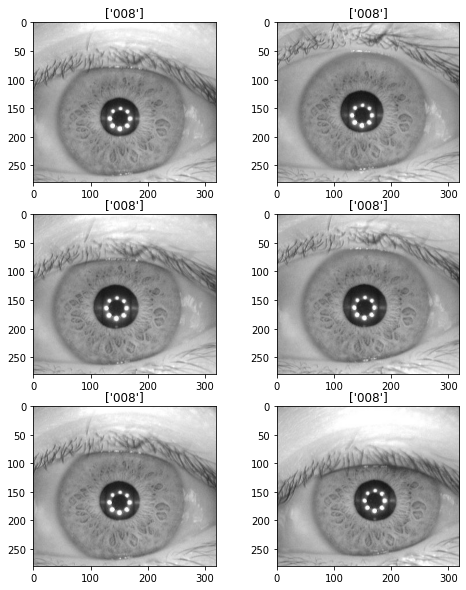

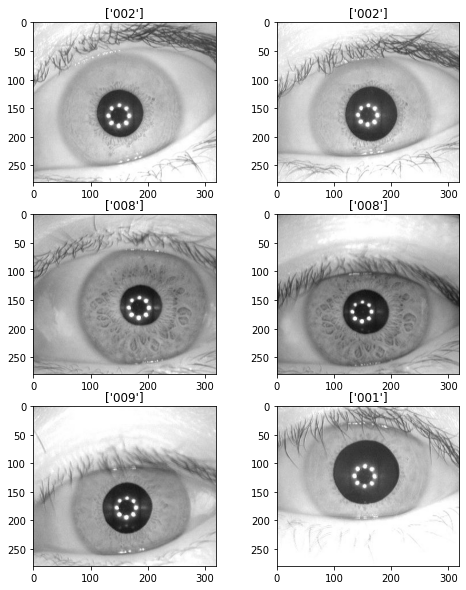

In [ ]:
X_train, X_test, y_train, y_test = load_dataset_custom(path_data=dirs["working"])

y_train = np.vectorize(int)(y_train) - 1
y_test = np.vectorize(int)(y_test) - 1


In [ ]:
BATCH_SIZE = 10

#DATASETS
train_ds    = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE).cache()
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE).cache()

In [ ]:
for x, y  in train_ds.take(1):
  print(x.shape)

(10, 280, 320, 3)


In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model

vgg19 = VGG19(input_shape=X_train[0].shape, weights='imagenet', include_top=False)
vgg19 = Model(inputs=vgg19.layers[0].input, outputs=vgg19.layers[-2].output)
vgg19.trainable = False

input = tf.keras.Input(shape=X_train[0].shape)

x = vgg19(input, training=False)
x = tf.keras.layers.Conv2D(kernel_size=(2,2), filters=10)(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.25)(x)
output = tf.keras.layers.Dense(50, activation="softmax")(x)
iris_recogntion = Model(input, output)

iris_recogntion.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['acc'])

iris_recogntion.summary()

Model: "model_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_47 (InputLayer)       [(None, 280, 320, 3)]     0         
                                                                 
 model_39 (Functional)       (None, 17, 20, 512)       20024384  
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 19, 10)        20490     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 9, 10)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 720)               0         
                                                                 
 dropout_4 (Dropout)         (None, 720)               0         
                                                          

In [ ]:
from tensorflow.python.ops.batch_ops import batch
history = iris_recogntion.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data=test_ds,
    epochs=10
)

Epoch 1/10
17/17 [==============================] - 313s 16s/step - loss: 28.0280 - acc: 0.0235 - val_loss: 15.1042 - val_acc: 0.1791
Epoch 2/10
17/17 [==============================] - 265s 16s/step - loss: 7.3353 - acc: 0.3706 - val_loss: 6.2961 - val_acc: 0.4328
Epoch 3/10
17/17 [==============================] - 265s 16s/step - loss: 1.1381 - acc: 0.7882 - val_loss: 3.9118 - val_acc: 0.7015
Epoch 4/10
17/17 [==============================] - 265s 16s/step - loss: 0.2713 - acc: 0.9176 - val_loss: 3.3482 - val_acc: 0.7313
Epoch 5/10
17/17 [==============================] - 264s 16s/step - loss: 0.1065 - acc: 0.9647 - val_loss: 2.8819 - val_acc: 0.7612
Epoch 6/10
17/17 [==============================] - 264s 16s/step - loss: 0.0129 - acc: 0.9941 - val_loss: 2.9144 - val_acc: 0.7612
Epoch 7/10
17/17 [==============================] - 264s 16s/step - loss: 0.1043 - acc: 0.9706 - val_loss: 2.9740 - val_acc: 0.7761
Epoch 8/10
17/17 [==============================] - 265s 16s/step - loss: 

In [ ]:
eval = iris_recogntion.evaluate(test_ds)

7/7 [==============================] - 77s 11s/step - loss: 3.0368 - acc: 0.8209


In [ ]:
from oauth2client.client import GoogleCredentials
from google.colab import auth
import gspread

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())


In [ ]:
st = gc.open_by_url("https://docs.google.com/spreadsheets/d/1IhgAz-J-8tGxGwKhGneVsnfg87lX1bpdTwefjzosB1Y/edit#gid=0")
page = st.get_worksheet(0)
page.update("D13", int(eval[1]*100))


{'spreadsheetId': '1IhgAz-J-8tGxGwKhGneVsnfg87lX1bpdTwefjzosB1Y',
 'updatedRange': "'Página1'!D13",
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}